In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/dogs-vs-cats


In [2]:
import os

base_path = path
for root, dirs, files in os.walk(base_path):
    print("Current directory:", root)
    print("Sub-directories:", dirs)
    print("Files:", files[:5])  # show only first 5 files for brevity
    print("=" * 40)

Current directory: /kaggle/input/dogs-vs-cats
Sub-directories: ['dogs_vs_cats', 'test', 'train']
Files: []
Current directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats
Sub-directories: ['test', 'train']
Files: []
Current directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats/test
Sub-directories: ['dogs', 'cats']
Files: []
Current directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats/test/dogs
Sub-directories: []
Files: ['dog.375.jpg', 'dog.704.jpg', 'dog.8597.jpg', 'dog.5740.jpg', 'dog.5703.jpg']
Current directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats/test/cats
Sub-directories: []
Files: ['cat.8762.jpg', 'cat.7083.jpg', 'cat.9820.jpg', 'cat.9604.jpg', 'cat.10448.jpg']
Current directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats/train
Sub-directories: ['dogs', 'cats']
Files: []
Current directory: /kaggle/input/dogs-vs-cats/dogs_vs_cats/train/dogs
Sub-directories: []
Files: ['dog.3443.jpg', 'dog.7971.jpg', 'dog.10728.jpg', 'dog.1942.jpg', 'dog.3259.jpg']
Current directory: /kaggle/input/dogs-vs

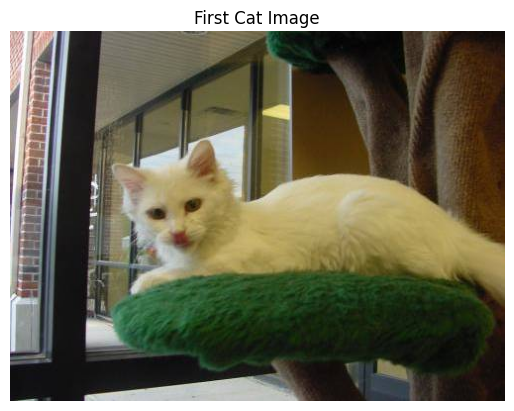

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

# Define the full path to the first cat image
cat_image_path =path+"/train/cats/cat.891.jpg"

# Load and display the image
img = Image.open(cat_image_path)
plt.imshow(img)
plt.axis('off')
plt.title("First Cat Image")
plt.show()


In [4]:

import os

cat_image_path = path+"/train/cats"
print("Exists:", os.path.exists(cat_image_path))


Exists: True


In [5]:
import os

cat_dir = path+"/train/cats"

# Check if directory exists
print("Exists:", os.path.exists(cat_dir))

# Get list of all image filenames
cat_filenames = sorted([f for f in os.listdir(cat_dir) if f.endswith(".jpg")])
print(f"Total cat test images: {len(cat_filenames)}")
print("First 5 files:", cat_filenames[:5])


Exists: True
Total cat test images: 10000
First 5 files: ['cat.0.jpg', 'cat.1.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10002.jpg']


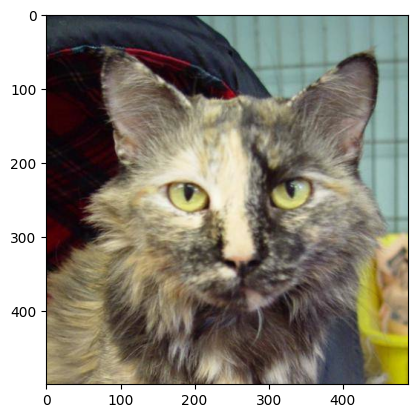

In [6]:

cat_image_path = path+"/test/cats/cat.10.jpg"

# Load and display the image
img = Image.open(cat_image_path)
plt.imshow(img)

In [7]:
import os

dog_dir =path+"/test/dogs"

# Check if directory exists
print("Exists:", os.path.exists(dog_dir))

# Get list of all image filenames
cat_filenames = sorted([f for f in os.listdir(dog_dir) if f.endswith(".jpg")])
print(f"Total cat test images: {len(cat_filenames)}")
print("First 5 files:", cat_filenames[:5])


Exists: True
Total cat test images: 2500
First 5 files: ['dog.100.jpg', 'dog.10006.jpg', 'dog.10010.jpg', 'dog.10014.jpg', 'dog.10017.jpg']


In [8]:
import os
import cv2

Images = []
Labels = []

# Paths to cat and dog image directories
cat_dir =path+"/test/cats"
dog_dir = path+"/test/dogs"

# Load cat images (label 0)
for file in os.listdir(cat_dir):
    img_path = os.path.join(cat_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(0)

# Load dog images (label 1)
for file in os.listdir(dog_dir):
    img_path = os.path.join(dog_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (255, 255))
        Images.append(img)
        Labels.append(1)

print(f"Total Images Loaded: {len(Images)}")
print(f"Total Labels: {len(Labels)}")
print(f"Example label values: {Labels[:10]}")


Total Images Loaded: 5000
Total Labels: 5000
Example label values: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
sample = Images[0]

plt.imshow(sample)
plt.title("Postive")

In [ ]:
len(Images)

array([[[188, 207, 203],
        [ 99, 120, 115],
        [ 25,  47,  43],
        ...,
        [194, 198, 208],
        [181, 186, 196],
        [171, 176, 185]],

       [[191, 211, 209],
        [101, 121, 119],
        [ 25,  46,  44],
        ...,
        [225, 232, 240],
        [213, 223, 230],
        [204, 215, 222]],

       [[197, 218, 219],
        [101, 122, 123],
        [ 19,  41,  43],
        ...,
        [232, 244, 247],
        [224, 238, 241],
        [215, 232, 235]],

       ...,

       [[191, 214, 234],
        [112, 135, 155],
        [ 46,  69,  89],
        ...,
        [ 54,  57,  61],
        [ 57,  60,  64],
        [ 61,  64,  68]],

       [[194, 211, 232],
        [111, 127, 148],
        [ 39,  56,  77],
        ...,
        [ 56,  59,  63],
        [ 56,  59,  63],
        [ 56,  59,  63]],

       [[196, 208, 230],
        [111, 123, 145],
        [ 38,  52,  73],
        ...,
        [ 50,  53,  57],
        [ 52,  54,  59],
        [ 54,  57,  61]]], dtype=uint8)
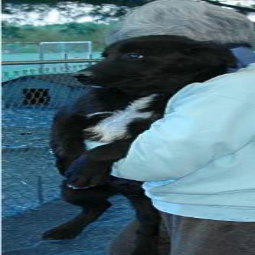

In [9]:
Images[2600]

In [10]:
Labels[2600]

1

In [11]:
import numpy as np

# Convert lists to NumPy arrays
X = np.array(Images, dtype=np.float32)
y = np.array(Labels)

# Now safely scale
X = X / 255.0


In [12]:
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, np.array(y), stratify = np.array(y),
                                                    random_state = 42,
                                                    shuffle = True, test_size = 0.2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

((4000, 255, 255, 3), (1000, 255, 255, 3), (4000,), (1000,))

Accuracy score -  0.529
Precision score -  0.502
Recall score -  0.5306553911205074
f1 score -  0.5159301130524152
----------  Classification Report   -------
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       527
           1       0.50      0.53      0.52       473

    accuracy                           0.53      1000
   macro avg       0.53      0.53      0.53      1000
weighted avg       0.53      0.53      0.53      1000



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

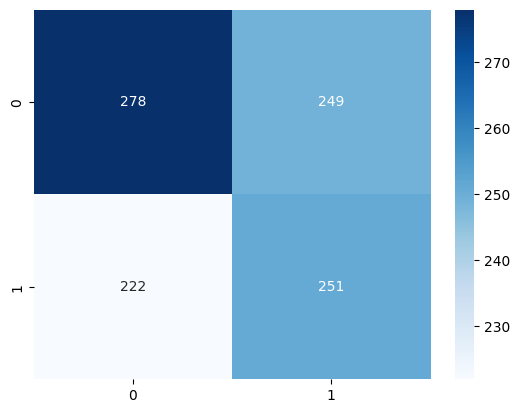

In [17]:
# Initialize and train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_X_flattened, train_y)

# Evaluate performance
get_score(dt.predict(test_X_flattened), test_y)

import joblib

# Save the model
joblib.dump(dt, 'DecisionTree_model.pkl')

# Download the model
from google.colab import files
files.download('DecisionTree_model.pkl')


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, np.array(y), stratify = np.array(y),
                                                    random_state = 42,
                                                    shuffle = True, test_size = 0.2)

train_X.shape, test_X.shape, train_y.shape, test_y.shape

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
def get_score(y_pred, y_true):
    print("Accuracy score - ", accuracy_score(y_pred, y_true))
    print("Precision score - ", precision_score(y_pred, y_true))
    print("Recall score - ", recall_score(y_pred, y_true))
    print("f1 score - ", f1_score(y_pred, y_true))
    print("----------  Classification Report   -------")
    print(classification_report(y_pred, y_true))

    matrix = confusion_matrix(y_pred, y_true)
    sns.heatmap(matrix, cmap='Blues', annot=True, fmt='d')

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Flatten the 255x255x3 images into 1D
train_X_flattened = train_X.reshape(train_X.shape[0], -1)
test_X_flattened = test_X.reshape(test_X.shape[0], -1)

print("Flattened train shape:", train_X_flattened.shape)
print("Flattened test shape:", test_X_flattened.shape)


Flattened train shape: (4000, 195075)
Flattened test shape: (1000, 195075)


In [ ]:
#MultinomialNB
# Try using X * 255 and cast to int
train_X_int = (train_X_flattened * 255).astype(np.int32)
test_X_int = (test_X_flattened * 255).astype(np.int32)

mnb = MultinomialNB()
mnb.fit(train_X_int, train_y)
get_score(mnb.predict(test_X_int), test_y)

# Save and download
joblib.dump(mnb, 'MultinomialNB_model.pkl')
files.download('MultinomialNB_model.pkl')


In [ ]:
# Binarize input
train_X_bin = (train_X_flattened > 0.5).astype(int)
test_X_bin = (test_X_flattened > 0.5).astype(int)

bnb = BernoulliNB()
bnb.fit(train_X_bin, train_y)
get_score(bnb.predict(test_X_bin), test_y)

# Save and download
joblib.dump(bnb, 'BernoulliNB_model.pkl')
files.download('BernoulliNB_model.pkl')
